Ho aggiunto al codice la distribuzione esponenziale:  
$p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$
e quella di Cauchy-Lorentz:  
$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$

Queste sono campionate a partire da $y\in [0;1]$ campionato uniformemente, usando la formula:  
$x=F_x^{-1}(y)$ con $F_x$ distribuzione cumulativa di x.  
Si ottengono quindi le formule:  
  
esponenziale:  
$x=-\frac{1}{\lambda} \ln(1-y)$  
Cauchy-Lorentz:  
$x= \mu + \Gamma \tan(\pi (y-\frac{1}{2}))$

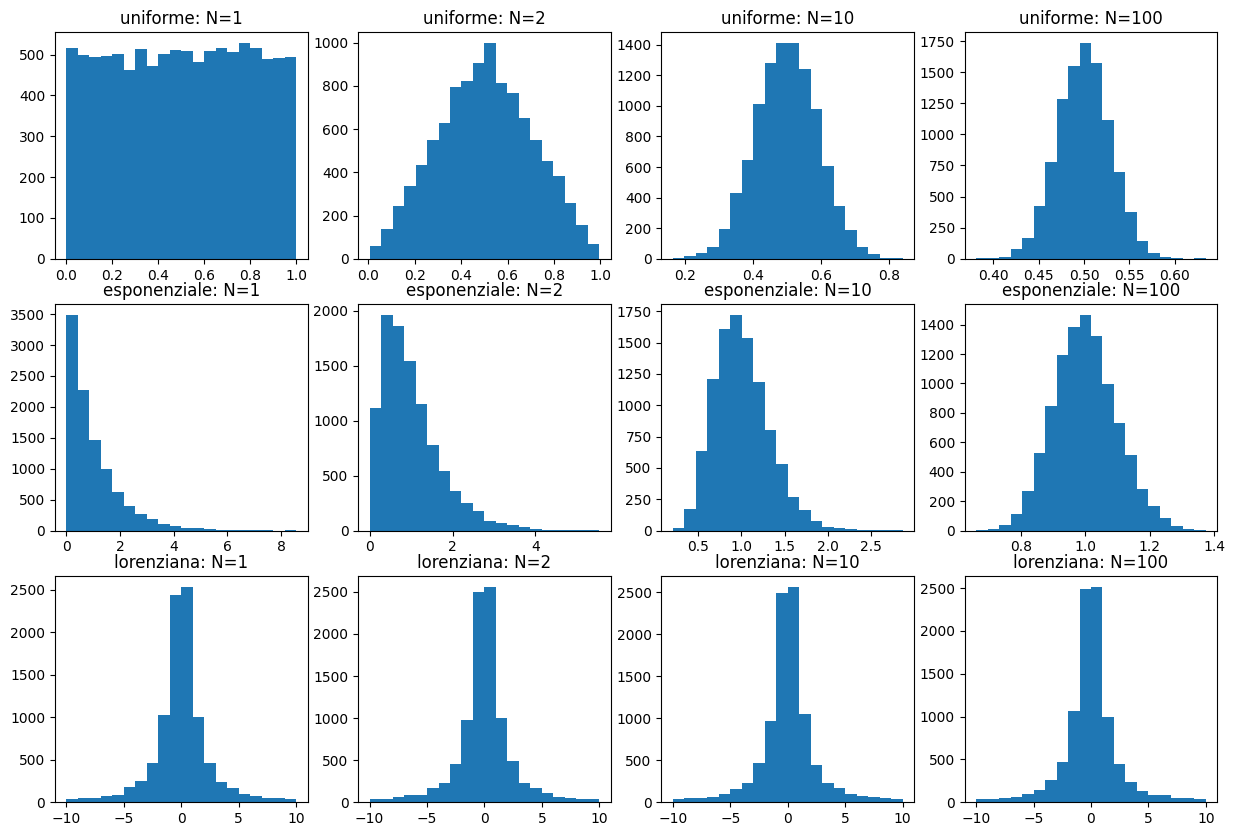

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# M=100
N=[1, 2, 10, 100]
titoli=["uniforme","esponenziale","lorenziana"]
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # Creazione di una griglia di subplot 3x4

for i in range(3):
    for k in range(4):

        # plt.subplot(1,4,i+1)
        with open("./"+titoli[i]+"/out_N"+str(k+1), 'r') as f: # con with il file si chiude da solo appena finito 
            righe=f.read().split("\n")
            # print(righe)
            S=[]
            for j in righe:
                if(j!=""):
                    try:
                        S.append(float(j))
                    except ValueError:
                        print(f"Il valore '{j}' non può essere convertito in float.")
        # axs[i, k].hist(S bins=np.linspace(0, 1, 6))  # Utilizzo np.linspace per specificare i bin (6 bin equispaziati fra 0 e 1)
        # axs[i, k].hist(S)
        if(i!=2):
            axs[i, k].hist(S, bins=20, range=(min(S), max(S)))
        else:
            axs[i, k].hist(S, bins=20, range=(-10, 10))
        axs[i, k].set_title(titoli[i] + ": N=" + str(N[k]))  # Imposto il titolo del subplot

        # plt.hist(S,bins=(0, 0.2,0.4,0.6,0.8,1))
plt.show()


La distribuzione uniforme e quella esponenziale sono distribuzioni con un secondo momento finito, sono quindi valide le ipotesi del teorema del limite centrale che garantiscono che variabili distribuite in quel modo hanno delle medie:  
$S_N = \frac{1}{N}\sum_{i=1}^N x_i$  
la cui distribuzione che converge alla distribuzione gaussiana con  
$N\rightarrow+\infty$.  
Invece la distribuzione di Cauchy-Lorentz ha varianza infinita e infatti la distribuzione in figura non converge a una gaussiana ma resta una lorentziana.  
Questo è dovuto al fatto che questa è una distribuzione  stabile.

Risolvendo gli integrali a mano trovo che i valori medi e le deviazioni standard delle distribuzioni (con varianza finita) sono:  
  
distribuzione esponenziale:
$E(x)=\frac{1}{\lambda}$  
$\sigma=\frac{1}{\lambda}$  
  
distribuzione uniforme: ($p(x)=\frac{1}{b-a},\ x\in [a;b]$)  
$E(x)=\frac{b+a}{2}$  
$\sigma=\frac{b-a}{\sqrt{12}}$  

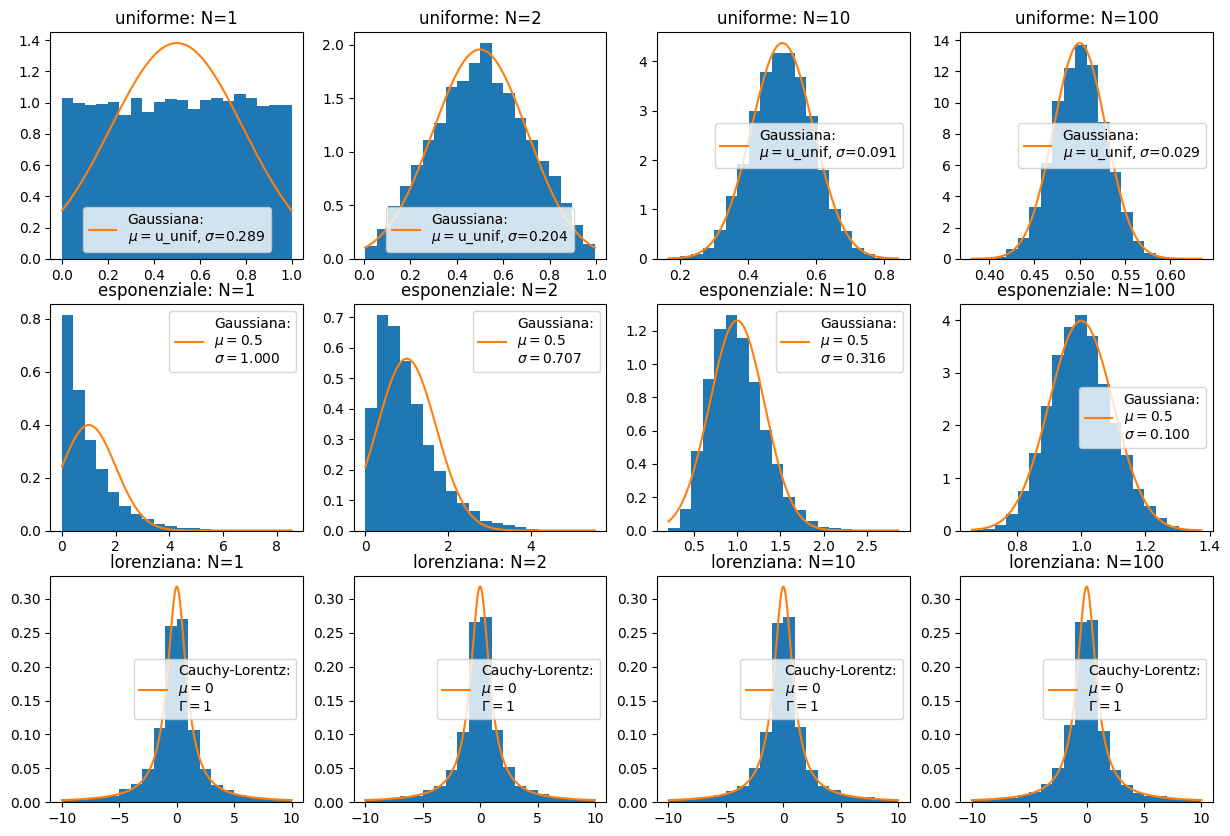

In [46]:
import matplotlib.pyplot as plt
import numpy as np

l=1.
b=1.
a=0.
g=1.
u=0.

def esp(X):
	return l*np.exp(-l*X)
def uni(X):
	return 1./(b-a)
def lor(X):
	return 1./np.pi * g/((x-u)**2+g**2)
def Gauss(X, mu, sigma):
	return (1. / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# x=[]

u_unif=(b+a)/2.
s_unif=(b-a)/np.sqrt(12)
u_esp=1./l
s_esp=1./l


N=[1, 2, 10, 100]
titoli=["uniforme","esponenziale","lorenziana"]
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # Creazione di una griglia di subplot 3x4

for i in range(3):
	
	for k in range(4):

		# plt.subplot(1,4,i+1)
		with open("./"+titoli[i]+"/out_N"+str(k+1), 'r') as f: # con with il file si chiude da solo appena finito 
			righe=f.read().split("\n")
			# print(righe)
			S=[]
			for j in righe:
				if(j!=""):
					try:
						S.append(float(j))
					except ValueError:
						print(f"Il valore '{j}' non può essere convertito in float.")
		# axs[i, k].hist(S bins=np.linspace(0, 1, 6))  # Utilizzo np.linspace per specificare i bin (6 bin equispaziati fra 0 e 1)
		# axs[i, k].hist(S)

		Num_av=len(S) # numero di medie calcolate
		# print(Num_av)
		
		if(i!=2):
			axs[i, k].hist(S, bins=20, range=(min(S), max(S)), density=True)
			x=np.linspace(min(S), max(S), 500)
		else:
			axs[i, k].hist(S, bins=20, range=(-10, 10), density=True)
			x=np.linspace(-10, 10, 500)
		if(i==0):
			s=s_unif/np.sqrt(N[k])
			y=Gauss(x, u_unif, s)
			axs[i, k].plot(x, y, label=r'Gaussiana:'+'\n'+'$\mu=$' + f"u_unif" + r', $\sigma$=' + f"{s:.3f}") # :.doublef mi specifica il mumero di cifre decimali che mostro
		if(i==1):
			s=s_esp/np.sqrt(N[k])
			y=Gauss(x, u_esp, s)

			axs[i, k].plot(x, y, label=r'Gaussiana:'+'\n'+'$\mu=$'+str(u_unif)+'\n'+r'$\sigma=$'+f"{s:.3f}")

		if(i==2):
			y=lor(x)
			axs[i, k].plot(x, y, label=r'Cauchy-Lorentz:'+'\n'+'$\mu=0$'+'\n'+r'$\Gamma=1$')


		axs[i, k].set_title(titoli[i] + ": N=" + str(N[k]))  # Imposto il titolo del subplot
		axs[i, k].legend() 
		# plt.hist(S,bins=(0, 0.2,0.4,0.6,0.8,1))
plt.show()

